# Company A Case
## Ender Erkaya
### 7/15/2024

In [1]:
#Import
import numpy as np
import pandas as pd
import math
from datetime import datetime as dt
import matplotlib.pyplot as plt
import scipy as sp

# PART A

In [2]:
#Load Data
df_sales      = pd.read_csv('assignment4.1a.csv')
df_promotions = pd.read_csv('PromotionDates.csv')

In [3]:
df_sales.tail()

,Date,StoreCode,ProductCode,SalesQuantity
1873613,2015-07-30,292,315,0
1873614,2015-07-31,12,315,1
1873615,2015-07-31,104,315,1
1873616,2015-07-31,261,315,1
1873617,2015-07-31,295,315,1


In [4]:
df_promotions

,Period,StartDate,EndDate
0,Promo1,2/10/2015,2/17/2015
1,Promo2,3/15/2015,3/22/2015
2,Promo3,5/24/2015,6/1/2015
3,Promo4,6/21/2015,6/28/2015
4,Promo5,1/9/2015,6/9/2015
5,Promo6,20/11/2015,27/11/2015


In [5]:
#Visualize Dataset
print(df_sales.head())
print(df_promotions)
print(df_sales.info())
print(df_promotions.info())
(num_rows_sales,num_columns_sales)=df_sales.shape
print("There are", num_rows_sales, "observations in the dataset")
print(df_sales.describe())
print(True in df_sales.duplicated())

         Date  StoreCode  ProductCode  SalesQuantity
0  2015-01-01          8            9             -1
1  2015-01-01        131            9              1
2  2015-01-01        144            9              2
3  2015-01-01        203            9              2
4  2015-01-01        256            9              0
    Period   StartDate     EndDate
0   Promo1   2/10/2015   2/17/2015
1   Promo2   3/15/2015   3/22/2015
2   Promo3   5/24/2015    6/1/2015
3   Promo4   6/21/2015   6/28/2015
4   Promo5    1/9/2015    6/9/2015
5  Promo6   20/11/2015  27/11/2015
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873618 entries, 0 to 1873617
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Date           object
 1   StoreCode      int64 
 2   ProductCode    int64 
 3   SalesQuantity  int64 
dtypes: int64(3), object(1)
memory usage: 57.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Co

In [6]:
df_sales["ProductCode"].nunique()

317

In [7]:
print(df_sales)
max(list(df_sales[df_sales["ProductCode"] == 217].SalesQuantity))

               Date  StoreCode  ProductCode  SalesQuantity
0        2015-01-01          8            9             -1
1        2015-01-01        131            9              1
2        2015-01-01        144            9              2
3        2015-01-01        203            9              2
4        2015-01-01        256            9              0
...             ...        ...          ...            ...
1873613  2015-07-30        292          315              0
1873614  2015-07-31         12          315              1
1873615  2015-07-31        104          315              1
1873616  2015-07-31        261          315              1
1873617  2015-07-31        295          315              1

[1873618 rows x 4 columns]


49

The dataset seems clean, there is no duplicated observations.

In [8]:
num_stores   = df_sales["StoreCode"].nunique()
num_products = df_sales["ProductCode"].nunique()
print("There are", num_stores, "stores")
print("There are", num_products, "products")

There are 340 stores
There are 317 products


In [9]:
def change_datetime(x):
    return dt.strptime(x,'%Y-%m-%d')
def change_datetime2(x):
    return dt.strptime(x,'%m/%d/%Y')
def add_zeros(x):
    return "0"+x

In [10]:
df_sales["Date"] = df_sales["Date"].map(change_datetime)

In [11]:
df_promotions.loc[:4,"StartDate"]=df_promotions.loc[:4,"StartDate"].map(add_zeros)
df_promotions.loc[:4,"EndDate"]=df_promotions.loc[:4,"EndDate"].map(add_zeros)
print(df_promotions)

    Period   StartDate     EndDate
0   Promo1  02/10/2015  02/17/2015
1   Promo2  03/15/2015  03/22/2015
2   Promo3  05/24/2015   06/1/2015
3   Promo4  06/21/2015  06/28/2015
4   Promo5   01/9/2015   06/9/2015
5  Promo6   20/11/2015  27/11/2015


In [12]:
import copy
df_promotions4 = copy.deepcopy(df_promotions.loc[:3,:])
df_promotions4["StartDate"]=df_promotions4["StartDate"].map(change_datetime2)
df_promotions4["EndDate"]=df_promotions4["EndDate"].map(change_datetime2)

In [13]:
num_promotions = 4
promotion_index=[]
for i in range(num_promotions):
    temp = df_sales[(df_sales["Date"]>= df_promotions4.loc[i,"StartDate"]) & (df_sales["Date"] <= df_promotions4.loc[i,"EndDate"])]
    promotion_index.extend(temp.index)

In [14]:
def weird_division(n, d):
    return n / d if d else 0

## Product Clustering

In [15]:
average_weekly_prom_sale_per_store    = np.zeros(num_products)
average_weekly_nonprom_sale_per_store = np.zeros(num_products)
average_weekly_sale_per_store         = np.zeros(num_products)
for i in range(num_products):
    prod_code = i+1
    if prod_code%50==0:
        print(prod_code)
    df_prod = df_sales[df_sales["ProductCode"]==prod_code]
    df_prod_prom    = copy.deepcopy(df_prod[df_prod.index.isin(promotion_index)])
    df_prod_nonprom = copy.deepcopy(df_prod[~df_prod.index.isin(promotion_index)])
    num_prom_days   = df_prod_prom["Date"].nunique() ##33
    num_nonprom_days= df_prod_nonprom["Date"].nunique() ##176
    total_prom_sale = df_prod_prom["SalesQuantity"].sum()
    total_nonprom_sale = df_prod_nonprom["SalesQuantity"].sum()
    total_sale = df_prod["SalesQuantity"].sum()
    average_weekly_prom_sale_per_store[prod_code-1] = (weird_division(total_prom_sale,num_prom_days)*7)/num_stores
    average_weekly_nonprom_sale_per_store[prod_code-1] = (weird_division(total_nonprom_sale,num_nonprom_days)*7)/num_stores
    average_weekly_sale_per_store[prod_code-1] = (weird_division(total_sale,(num_prom_days+num_nonprom_days))*7)/num_stores

50
100
150
200
250
300


### Visualize Average Sales of Products in NonPromotion Period

217


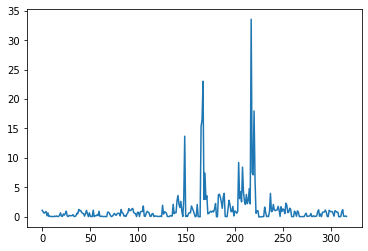

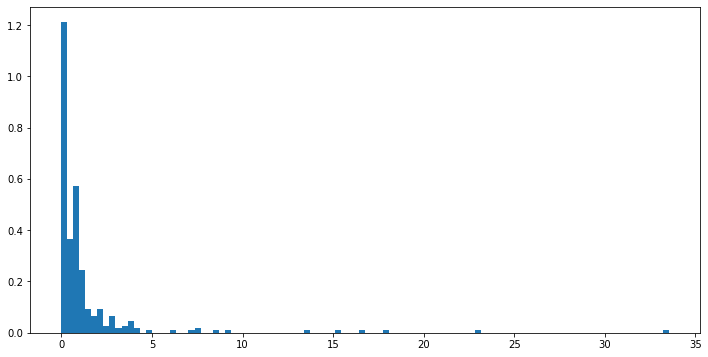

In [16]:
print(average_weekly_nonprom_sale_per_store.argmax())
plt.plot(average_weekly_nonprom_sale_per_store)
plt.figure(figsize=(12,6),edgecolor='blue')
plt.hist(average_weekly_nonprom_sale_per_store,100,density=1)
plt.show()

In [17]:
mean_nonprom_prod   = np.mean(average_weekly_nonprom_sale_per_store[average_weekly_nonprom_sale_per_store>0])
median_nonprom_prod = np.median(average_weekly_nonprom_sale_per_store[average_weekly_nonprom_sale_per_store>0])
std_nonprom_prod    = np.std(average_weekly_nonprom_sale_per_store[average_weekly_nonprom_sale_per_store>0])
print("Mean:", mean_nonprom_prod)
print("Median:", median_nonprom_prod)
print("Standard Deviation:", std_nonprom_prod)

Mean: 1.2985159384959397
Median: 0.5788859677949392
Standard Deviation: 3.110791139224686


In [18]:
robust_std_nonprom_prod    = np.std(average_weekly_nonprom_sale_per_store[(0<average_weekly_nonprom_sale_per_store)&(average_weekly_nonprom_sale_per_store<median_nonprom_prod+2*std_nonprom_prod)])
print(robust_std_nonprom_prod)
robust_mean_nonprom_prod = np.mean(average_weekly_nonprom_sale_per_store[(0<average_weekly_nonprom_sale_per_store)&(average_weekly_nonprom_sale_per_store<median_nonprom_prod+2*std_nonprom_prod)])
print(robust_mean_nonprom_prod)

0.9844575895312891
0.8038749804471049


### I apply roughly exponential distribution fitting to this histogram with robust std=0.98 and median=0.58. The fitted exponential distribution is $\lambda e^{-\lambda x}$ with $\lambda=1.1$. I choose slow items as the products up to first quartile of the distribution, which is $< ln(4/3)/\lambda = 0.26$, medium items are between first and third quartile, where $0.26< x < 1.26$, and fast items are $x>1.26$. Alternative approach is treating distribution as a combination of a three different distribution

In [19]:
slow_threshold     = 0.26
medium_lower_bound = slow_threshold
medium_upper_bound = 1.26
fast_threshold     = medium_upper_bound

In [20]:
slow_product_index   = np.where(average_weekly_nonprom_sale_per_store<=slow_threshold)
medium_product_index = np.where((average_weekly_nonprom_sale_per_store>medium_lower_bound)&(average_weekly_nonprom_sale_per_store<medium_upper_bound))
fast_product_index   = np.where(average_weekly_nonprom_sale_per_store>=fast_threshold)

In [21]:
slow_product_positive_index = np.where((0<average_weekly_nonprom_sale_per_store)&(average_weekly_nonprom_sale_per_store<=slow_threshold))

In [22]:
print(np.array(slow_product_index).shape)
print(np.array(slow_product_positive_index).shape)

(1, 128)
(1, 116)


In [23]:
print(np.shape(slow_product_index))
print(np.shape(medium_product_index))
print(np.shape(fast_product_index))
print(np.shape(average_weekly_nonprom_sale_per_store))

(1, 128)
(1, 126)
(1, 63)
(317,)


(0.0, 2.0)

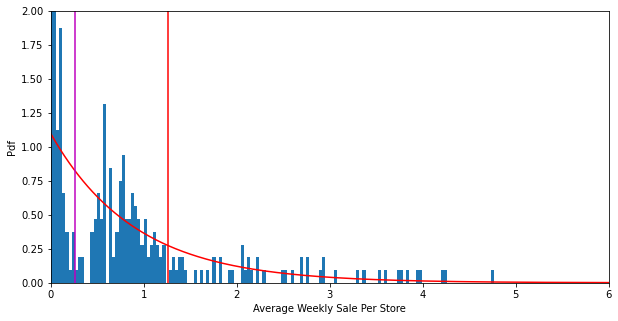

In [24]:
#def exponential_distribution(x):
#    return lambda*np.exp(-lambda * x)
lambada = 1.1
xx = np.linspace(0,10,1000)
plt.figure(figsize=(10,5),edgecolor='blue')
plt.plot(xx, lambada*np.exp(-lambada * xx),'r')
plt.hist(average_weekly_nonprom_sale_per_store,1000,density=True)
plt.axvline(x = 0.26, color = 'm', label = 'axvline - full height')
plt.axvline(x = 1.26, color = 'r', label = 'axvline - full height')
plt.xlabel("Average Weekly Sale Per Store")
plt.ylabel("Pdf")
ax = plt.gca()
ax.set_xlim([0, 6])
ax.set_ylim([0, 2])

## Stores Clustering

In [25]:
average_weekly_prom_sale_per_product    = np.zeros(num_stores)
average_weekly_nonprom_sale_per_product = np.zeros(num_stores)
average_weekly_sale_per_product         = np.zeros(num_stores)
for i in range(num_stores):
    store_code = i+1
    if store_code%50==0:
        print(store_code)
    df_store = df_sales[df_sales["StoreCode"]==store_code]
    df_store_prom    = copy.deepcopy(df_store[df_store.index.isin(promotion_index)])
    df_store_nonprom = copy.deepcopy(df_store[~df_store.index.isin(promotion_index)])
    num_prom_days   = df_store_prom["Date"].nunique() ##33
    num_nonprom_days= df_store_nonprom["Date"].nunique() ##176
    total_prom_sale = df_store_prom["SalesQuantity"].sum()
    total_nonprom_sale = df_store_nonprom["SalesQuantity"].sum()
    total_sale = df_store["SalesQuantity"].sum()
    average_weekly_prom_sale_per_product[store_code-1] = (weird_division(total_prom_sale,num_prom_days)*7)/num_products
    average_weekly_nonprom_sale_per_product[store_code-1] = (weird_division(total_nonprom_sale,num_nonprom_days)*7)/num_products
    average_weekly_sale_per_product[store_code-1] = (weird_division(total_sale,(num_prom_days+num_nonprom_days))*7)/num_products

50
100
150
200
250
300


### Visualize Average Sales of Store in Non Promotion Period

In [26]:
print(np.where(average_weekly_nonprom_sale_per_product<0))

(array([], dtype=int64),)


330


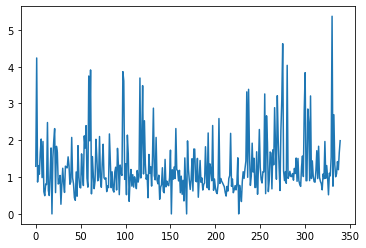

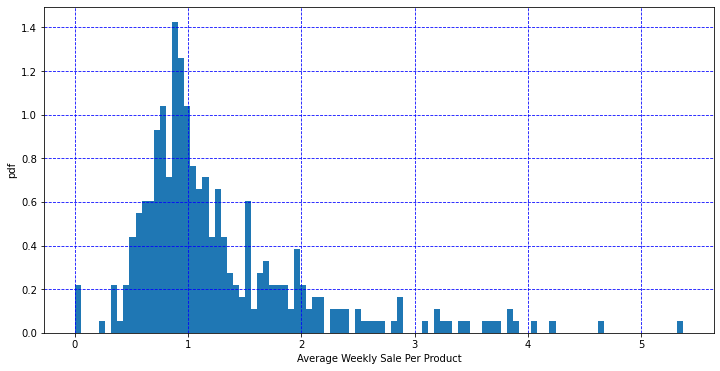

In [27]:
print(average_weekly_nonprom_sale_per_product.argmax())
plt.plot(average_weekly_nonprom_sale_per_product)
plt.figure(figsize=(12,6),edgecolor='blue')
plt.hist(average_weekly_nonprom_sale_per_product,100,density=1)
plt.grid(color='b', linestyle='--')
plt.xlabel("Average Weekly Sale Per Product")
plt.ylabel("pdf")
plt.show()

### The histogram resembles to one gaussian distribution. We need to estimate parameters in order to fit Gaussian Kernel.

In [28]:
mean_nonprom_store   = np.mean(average_weekly_nonprom_sale_per_product)
median_nonprom_store = np.median(average_weekly_nonprom_sale_per_product)
std_nonprom_store    = np.std(average_weekly_nonprom_sale_per_product)
print("Mean:", mean_nonprom_store)
print("Median:", median_nonprom_store)
print("Standard Deviation:", std_nonprom_store)

Mean: 1.2699511018650034
Median: 1.0166582780987488
Standard Deviation: 0.7863662535877576


(0.0, 3.0)

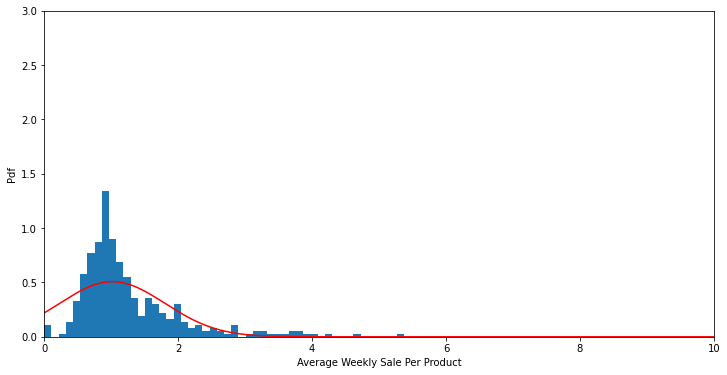

In [29]:
## Fitting Gaussian Distribution
def gaussian(x, mu, sig):
    return (1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2))

mu    = median_nonprom_store
sigma = std_nonprom_store

xx = np.linspace(0,10,1000)
plt.figure(figsize=(12,6),edgecolor='blue')
plt.plot(xx, gaussian(xx,mu,sigma),'r')
plt.hist(average_weekly_nonprom_sale_per_product,50,density=True)
plt.xlabel("Average Weekly Sale Per Product")
plt.ylabel("Pdf")
ax = plt.gca()
ax.set_xlim([0, 10])
ax.set_ylim([0, 3])

In [30]:
lower_threshold = mean_nonprom_store - std_nonprom_store
upper_threshold = mean_nonprom_store + std_nonprom_store
print(lower_threshold)
print(upper_threshold)

0.4835848482772458
2.056317355452761


### Different Approach:Gaussian Mixture

In [31]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(average_weekly_nonprom_sale_per_product.reshape(-1, 1))
[mu1,mu2,mu3] = gm.means_
[sigma1,sigma2,sigma3] = gm.covariances_.reshape(-1,1)
print(mu1,sigma1)
print(mu2,sigma2)
print(mu3,sigma3)

[0.89118897] [0.08010906]
[3.31890271] [0.60013663]
[1.78348153] [0.13729891]


In [32]:
gm.weights_

array([0.70986619, 0.07807493, 0.21205888])

1.4514514514514514
2.5825825825825826


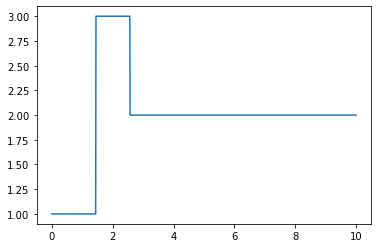

In [33]:
xx = np.linspace(0,10,1000)
clusters = gm.predict(xx.reshape(-1,1))+1
plt.plot(xx,clusters)
temp_index  = np.array(np.where(np.gradient(clusters))).reshape(-1,)+1
lower_threshold = xx[temp_index[0]]
upper_threshold = xx[temp_index[-1]]
print(lower_threshold)
print(upper_threshold)

(0.0, 4.0)

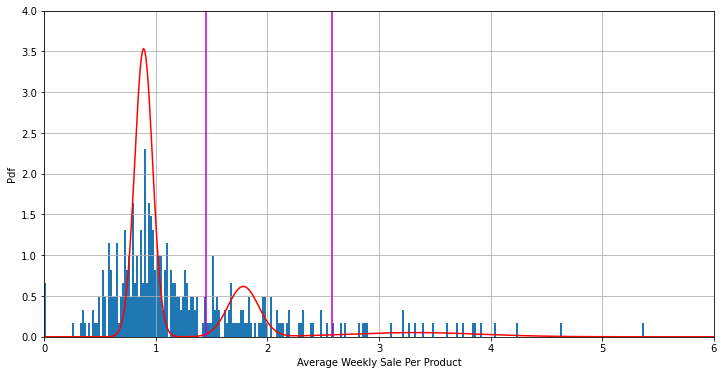

In [34]:
xx = np.linspace(0,10,1000)

plt.figure(figsize=(12,6),edgecolor='blue')
plt.hist(average_weekly_nonprom_sale_per_product,300,density=True)
plt.plot(xx, gm.weights_[0]*gaussian(xx,mu1,sigma1)+gm.weights_[1]*gaussian(xx,mu2,sigma2)+gm.weights_[2]*gaussian(xx,mu3,sigma3),'r')
plt.axvline(x = lower_threshold, color = 'm', label = 'axvline - full height')
plt.axvline(x = upper_threshold, color = 'm', label = 'axvline - full height')
plt.grid()
plt.xlabel("Average Weekly Sale Per Product")
plt.ylabel("Pdf")
ax = plt.gca()
ax.set_xlim([0, 6])
ax.set_ylim([0, 4])

### Different Approach: Log Normal Distribution

In [35]:
mu_lognormal = 7e-3 #estimated from median
sigma_lognormal = math.sqrt(2*(math.log(mean_nonprom_store)-mu_lognormal))
mode_nonprom_store = np.array(sp.stats.mode(average_weekly_nonprom_sale_per_product))
print(sigma_lognormal)

0.6811437399855622


(0.0, 2.0)

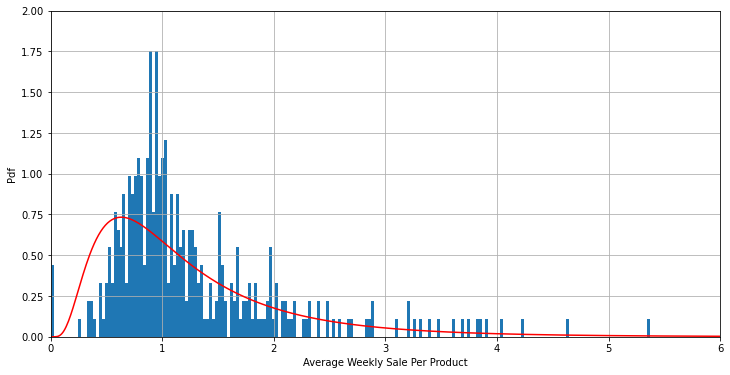

In [36]:
def lognormal(x, mu, sig):
    return (1.0 / (x*(np.sqrt(2.0 * np.pi) * sig)) * np.exp(-np.power((np.log(x) - mu) / sig, 2.0) / 2))

xx = np.linspace(1e-16,10,1000)

plt.figure(figsize=(12,6),edgecolor='blue')
plt.hist(average_weekly_nonprom_sale_per_product,200,density=True)
plt.plot(xx, lognormal(xx,mu_lognormal,sigma_lognormal),'r')
plt.grid()
plt.xlabel("Average Weekly Sale Per Product")
plt.ylabel("Pdf")
ax = plt.gca()
ax.set_xlim([0, 6])
ax.set_ylim([0, 2])

In [37]:
mu_lognormal = 7e-3
sigma_lognormal = 0.5

(0.0, 2.0)

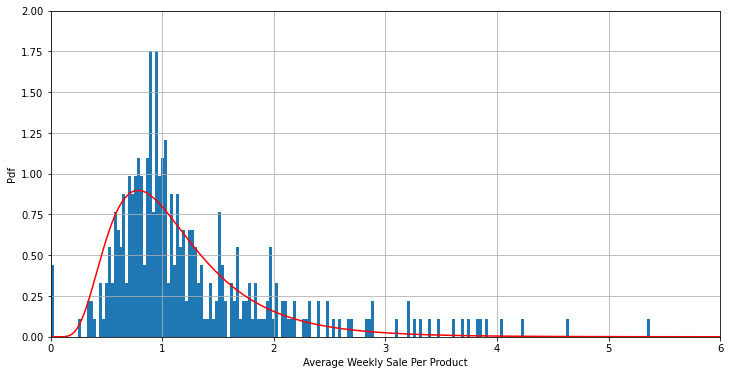

In [38]:
xx = np.linspace(1e-16,10,1000)

plt.figure(figsize=(12,6),edgecolor='blue')
plt.hist(average_weekly_nonprom_sale_per_product,200,density=True)
plt.plot(xx, lognormal(xx,mu_lognormal,sigma_lognormal),'r')
plt.xlabel("Average Weekly Sale Per Product")
plt.ylabel("Pdf")
plt.grid()
ax = plt.gca()
ax.set_xlim([0, 6])
ax.set_ylim([0, 2])

In [39]:
from scipy.special import erfinv, erf
lower_store_threshold = math.exp(mu_lognormal+math.sqrt(0.5)*erfinv(2*0.33-1))
print(lower_store_threshold)
upper_store_threshold = math.exp(mu_lognormal+math.sqrt(0.5)*erfinv(2*0.66-1))
print(upper_store_threshold)

0.8081912258252554
1.2376712190529844


(0.0, 2.0)

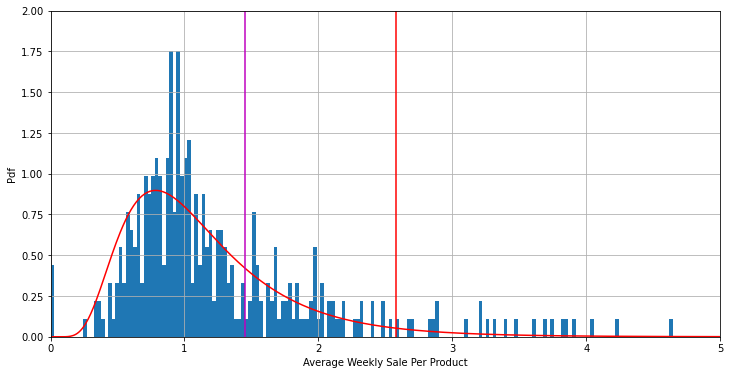

In [40]:
xx = np.linspace(1e-16,10,1000)

plt.figure(figsize=(12,6),edgecolor='blue')
plt.hist(average_weekly_nonprom_sale_per_product,200,density=True)
plt.plot(xx, lognormal(xx,mu_lognormal,sigma_lognormal),'r')
plt.axvline(x = lower_threshold, color = 'm', label = 'axvline - full height')
plt.axvline(x = upper_threshold, color = 'r', label = 'axvline - full height')
plt.grid()
plt.xlabel("Average Weekly Sale Per Product")
plt.ylabel("Pdf")
ax = plt.gca()
ax.set_xlim([0, 5])
ax.set_ylim([0, 2])

In [41]:
slow_store_index   = np.where(average_weekly_nonprom_sale_per_product<=lower_store_threshold)
medium_store_index = np.where((average_weekly_nonprom_sale_per_product>lower_store_threshold)&(average_weekly_nonprom_sale_per_product<upper_store_threshold))
fast_store_index   = np.where(average_weekly_nonprom_sale_per_product>=upper_store_threshold)

In [42]:
print(np.array(slow_store_index).shape)
print(np.array(medium_store_index).shape)
print(np.array(fast_store_index).shape)

(1, 90)
(1, 129)
(1, 121)


## c Promotion Effects on Items

In [43]:
difference_average_sale_product = (average_weekly_prom_sale_per_store - average_weekly_nonprom_sale_per_store)
difference_average_sale_ratio_product = ((difference_average_sale_product-1e-16)/(abs(average_weekly_nonprom_sale_per_store)+1e-16))

In [44]:
print(np.mean(difference_average_sale_product))

0.3567650786855136


In [45]:
difference_average_sale_product[162]
print(average_weekly_prom_sale_per_store[162])
print(average_weekly_nonprom_sale_per_store[162])
print(average_weekly_sale_per_store[162])

0.020588235294117647
-0.002058823529411765
0.0017156862745098037


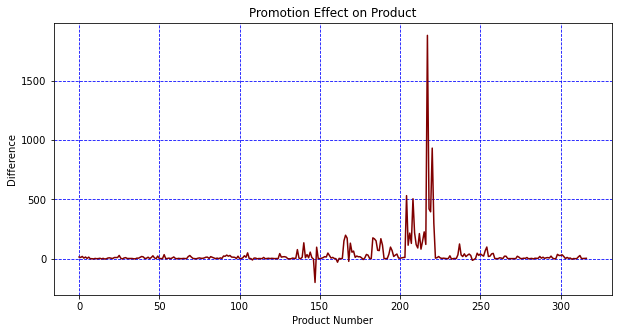

In [46]:
# creating the dataset
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.plot(range(num_products),100*difference_average_sale_product,color ='maroon')
plt.grid(color='b', linestyle='--')
plt.xlabel("Product Number")
plt.ylabel("Difference")
plt.title("Promotion Effect on Product")
plt.show()

In [47]:
negative_affected_products_index = np.array(np.where(difference_average_sale_product<0))
print(negative_affected_products_index)
print(difference_average_sale_product[147])
print(average_weekly_prom_sale_per_store[147])
print(average_weekly_nonprom_sale_per_store[147])

[[  7   8   9  11  14  16  17  27  34  35  57  61  73 108 111 116 124 131
  132 138 146 147 160 161 163 168 177 232 245 246 272 280 283 296 297 307]]
-2.005949579831933
0.8885882352941177
2.894537815126051


In [48]:
highest_increased_products = np.array(np.where(difference_average_sale_product>2))+1
print(highest_increased_products)
print(np.array(fast_product_index)+1)

[[205 207 209 210 213 216 218 219 220 221 222]]
[[ 91  94  95 106 126 137 141 142 143 144 145 148 149 156 157 162 166 167
  168 169 170 171 172 180 181 184 185 186 187 188 189 190 194 195 196 199
  205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
  232 238 241 246 249 251 254 255 258]]


In [49]:
positive_product_index = np.array(np.where(0<average_weekly_nonprom_sale_per_store))
print(positive_product_index.shape)

(1, 305)


In [50]:
print(difference_average_sale_ratio_product[positive_product_index].shape)

(1, 305)


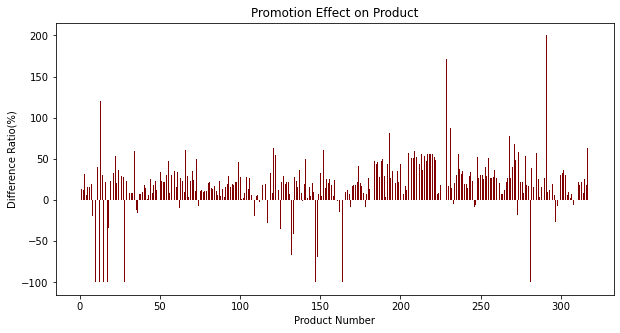

In [51]:
# creating the dataset
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(positive_product_index.reshape(-1,)+1,100*difference_average_sale_ratio_product[positive_product_index].reshape(-1,),color ='maroon', 
        width = 0.6)

plt.xlabel("Product Number")
plt.ylabel("Difference Ratio(%)")
plt.title("Promotion Effect on Product")
plt.show()

In [52]:
difference_average_sale_ratio_product[12]

1.1999999999999613

In [53]:
highest_increased_ratio_products_index = np.where(difference_average_sale_ratio_product>50)
print(np.array(highest_increased_ratio_products_index)+1)
print(np.array(fast_product_index)+1)

[]
[[ 91  94  95 106 126 137 141 142 143 144 145 148 149 156 157 162 166 167
  168 169 170 171 172 180 181 184 185 186 187 188 189 190 194 195 196 199
  205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
  232 238 241 246 249 251 254 255 258]]


### There are returned items during nonprom periods that should be further investigated.

In [54]:
returned_products_nonprom_index = np.array(np.where(average_weekly_nonprom_sale_per_store<0))
print(returned_products_nonprom_index+1)
### Check if their sales increased
temp = average_weekly_prom_sale_per_store - average_weekly_nonprom_sale_per_store
print(temp[returned_products_nonprom_index])

[[160 163 165 182 226 227 228 309]]
[[0.01544118 0.02264706 0.02058824 0.02058824 0.06176471 0.02058824
  0.04117647 0.01029412]]


In [55]:
print(np.array(np.where(average_weekly_prom_sale_per_store<0)))

[]


In [56]:
print(np.where((difference_average_sale_ratio_product>40)&(difference_average_sale_product>2)))

(array([], dtype=int64),)


### The sales of returned products (160, 163, 165, 182, 226, 227, 228, 309) changes to positive by promotion. Also there are items that returned negative during promotion period.

## d Stores Reaction by Promotion

In [57]:
difference_average_sale_stores = (average_weekly_prom_sale_per_product - average_weekly_nonprom_sale_per_product)
difference_average_sale_ratio_stores = ((difference_average_sale_stores-1e-16)/(average_weekly_nonprom_sale_per_product+1e-16))

1.233191921389463
1.8696109358569928
0.6364190144675297
0.33136178455545656
0.41462319289041183


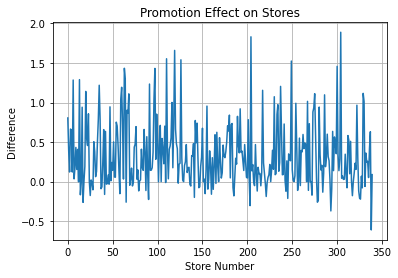

In [173]:
plt.plot(difference_average_future_sale_store)
plt.xlabel("Store Number")
plt.ylabel("Difference")
plt.title("Promotion Effect on Stores")
plt.grid()
print(difference_average_future_sale_store[91])
print(average_weekly_prom_future_sale_per_product[91])
print(average_weekly_nonprom_future_sale_per_product[91])
print(np.mean(difference_average_future_sale_store))
print(np.std(difference_average_future_sale_store[difference_average_future_sale_store<20]))

In [59]:
highest_affected_stores = np.array(np.where(difference_average_sale_stores>1.1))+1

## f. Fast vs Slow Products Change by Promotion

In [60]:
fast_products_nonprom_sale = average_weekly_nonprom_sale_per_store[fast_product_index]
slow_products_nonprom_sale = average_weekly_nonprom_sale_per_store[slow_product_index]
slow_products_positive_nonprom_sale = average_weekly_nonprom_sale_per_store[slow_product_positive_index]
medium_products_nonprom_sale = average_weekly_nonprom_sale_per_store[medium_product_index]
fast_products_prom_sale = average_weekly_prom_sale_per_store[fast_product_index]
slow_products_prom_sale = average_weekly_prom_sale_per_store[slow_product_index]
slow_products_positive_prom_sale = average_weekly_prom_sale_per_store[slow_product_positive_index]
medium_products_prom_sale = average_weekly_prom_sale_per_store[medium_product_index]
difference_fast_products_sale = fast_products_prom_sale - fast_products_nonprom_sale
difference_slow_products_sale = slow_products_prom_sale - slow_products_nonprom_sale
difference_slow_products_positive_sale = slow_products_positive_prom_sale - slow_products_positive_nonprom_sale
difference_medium_products_sale = medium_products_prom_sale - medium_products_nonprom_sale

In [61]:
print(np.mean(difference_fast_products_sale))
print(np.mean(difference_slow_products_sale))
print(np.mean(difference_slow_products_positive_sale))
print(np.mean(difference_medium_products_sale))

1.5062950967809055
0.013001028267927515
0.01250899468103969
0.13122069228425434


In [62]:
difference_fast_products_sale_ratio = difference_fast_products_sale / (fast_products_nonprom_sale+1e-16)
difference_slow_products_sale_ratio = (difference_slow_products_positive_sale) / (slow_products_positive_nonprom_sale)
difference_medium_products_sale_ratio = difference_medium_products_sale / (medium_products_nonprom_sale)
print(np.mean(difference_fast_products_sale_ratio))
print(np.mean(difference_slow_products_sale_ratio))
print(np.mean(difference_medium_products_sale_ratio))

0.2951170900174284
0.1640883806544902
0.17082839293429286


## g. Fast vs Slow Stores Change by Promotion

In [63]:
fast_stores_nonprom_sale = average_weekly_nonprom_sale_per_product[fast_store_index]
slow_stores_nonprom_sale = average_weekly_nonprom_sale_per_product[slow_store_index]
medium_stores_nonprom_sale = average_weekly_nonprom_sale_per_product[medium_store_index]
fast_stores_prom_sale = average_weekly_prom_sale_per_product[fast_store_index]
slow_stores_prom_sale = average_weekly_prom_sale_per_product[slow_store_index]
medium_stores_prom_sale = average_weekly_prom_sale_per_product[medium_store_index]
difference_fast_stores_sale = fast_stores_prom_sale - fast_stores_nonprom_sale
difference_slow_stores_sale = slow_stores_prom_sale - slow_stores_nonprom_sale
difference_medium_stores_sale = medium_stores_prom_sale - medium_stores_nonprom_sale

In [64]:
print(np.mean(difference_fast_stores_sale))
print(np.mean(difference_slow_stores_sale))
print(np.mean(difference_medium_stores_sale))

0.7971619657431998
0.14053634638139884
0.2683141076011657


In [65]:
difference_fast_stores_sale_ratio = difference_fast_stores_sale / (fast_stores_nonprom_sale)
difference_slow_stores_sale_ratio = (difference_slow_stores_sale-1e-16) / (abs(slow_stores_nonprom_sale)+1e-16)
difference_medium_stores_sale_ratio = difference_medium_stores_sale / (medium_stores_nonprom_sale)
print(np.median(difference_fast_stores_sale_ratio))
print(np.median(difference_slow_stores_sale_ratio))
print(np.median(difference_medium_stores_sale_ratio))

0.306918067131211
0.23928485979519554
0.2614328424316245


In [66]:
print(difference_fast_stores_sale_ratio.shape)

(121,)


In [67]:
temp  = average_weekly_prom_sale_per_product/(abs(average_weekly_nonprom_sale_per_product)+1e-16)
temp2 = np.log(temp, out=np.zeros_like(temp, dtype=np.float64), where=(temp!=0))
mean_temp = np.mean(temp2)
std_temp = np.std(temp2)
print(mean_temp)
print(std_temp)
lognormal_mean_stores = math.exp(mean_temp+(std_temp**2)/2)-1
print(lognormal_mean_stores)

0.23577564155273337
0.19088375327855908
0.28916399859541553


In [68]:
temp  = fast_stores_prom_sale/fast_stores_nonprom_sale
temp2 = np.log(temp, out=np.zeros_like(temp, dtype=np.float64), where=(temp!=0))
mean_temp_fast = np.mean(temp2)
std_temp_fast = np.std(temp2)
print(mean_temp_fast)
print(std_temp_fast)
lognormal_mean_fast_stores = math.exp(mean_temp_fast+(std_temp_fast**2)/2)-1
print(lognormal_mean_fast_stores)

0.27759026798524
0.24130160023532526
0.3589379820290288


In [69]:
temp  = slow_stores_prom_sale/(slow_stores_nonprom_sale+1e-16)
temp2 = np.log(temp, out=np.zeros_like(temp, dtype=np.float64), where=(temp!=0))
mean_temp_slow = np.mean(temp2)
std_temp_slow = np.std(temp2)
print(mean_temp_slow)
print(std_temp_slow)
lognormal_mean_slow_stores = math.exp(mean_temp_slow+(std_temp_slow**2)/2)-1
print(lognormal_mean_slow_stores)

0.18644892898327453
0.16524296114639783
0.221526794350563


In [70]:
temp  = medium_stores_prom_sale/(medium_stores_nonprom_sale+1e-16)
temp2 = np.log(temp, out=np.zeros_like(temp, dtype=np.float64), where=(temp!=0))
mean_temp_medium = np.mean(temp2)
std_temp_medium = np.std(temp2)
print(mean_temp_medium)
print(std_temp_medium)
lognormal_mean_medium_stores = math.exp(mean_temp_medium+(std_temp_medium**2)/2)-1
print(lognormal_mean_medium_stores)

0.23096815576139984
0.13786991413799382
0.2718495916568828


### To observe the effect of the Store 92:

In [71]:
print(np.array(fast_store_index))
fast_store_index2 = np.delete(fast_store_index,np.array(np.where(np.array(fast_store_index).reshape(-1,) == 91)))
print(fast_store_index2)

[[  0   1   3   5   6   8  13  17  19  20  21  23  24  30  33  34  35  36
   37  40  47  51  54  55  56  59  60  61  63  67  68  71  74  75  82  83
   89  91  92  94  97  98 100 102 103 116 118 119 121 122 126 128 130 131
  134 141 144 150 154 156 166 169 174 176 177 180 183 189 192 194 197 204
  217 225 234 235 237 238 241 243 246 248 249 250 255 257 258 261 262 264
  265 266 267 269 270 271 273 274 275 280 290 292 296 297 299 300 303 304
  306 308 313 315 322 324 329 330 332 333 336 338 339]]
[  0   1   3   5   6   8  13  17  19  20  21  23  24  30  33  34  35  36
  37  40  47  51  54  55  56  59  60  61  63  67  68  71  74  75  82  83
  89  92  94  97  98 100 102 103 116 118 119 121 122 126 128 130 131 134
 141 144 150 154 156 166 169 174 176 177 180 183 189 192 194 197 204 217
 225 234 235 237 238 241 243 246 248 249 250 255 257 258 261 262 264 265
 266 267 269 270 271 273 274 275 280 290 292 296 297 299 300 303 304 306
 308 313 315 322 324 329 330 332 333 336 338 339]


In [72]:
fast_stores_nonprom_sale = average_weekly_nonprom_sale_per_product[fast_store_index]
fast_stores_nonprom_sale2 = average_weekly_nonprom_sale_per_product[fast_store_index2]
slow_stores_nonprom_sale = average_weekly_nonprom_sale_per_product[slow_store_index]
fast_stores_prom_sale = average_weekly_prom_sale_per_product[fast_store_index]
fast_stores_prom_sale2 = average_weekly_prom_sale_per_product[fast_store_index2]
slow_stores_prom_sale = average_weekly_prom_sale_per_product[slow_store_index]
difference_fast_stores_sale = fast_stores_prom_sale - fast_stores_nonprom_sale
difference_fast_stores_sale2 = fast_stores_prom_sale2 - fast_stores_nonprom_sale2
difference_slow_stores_sale = slow_stores_prom_sale - slow_stores_nonprom_sale

In [73]:
print(np.mean(difference_fast_stores_sale2))
print(np.mean(difference_slow_stores_sale))

0.6136542635825073
0.14053634638139884


In [74]:
difference_fast_stores_sale_ratio2 = difference_fast_stores_sale2 / (fast_stores_nonprom_sale2)
difference_slow_stores_sale_ratio = (difference_slow_stores_sale[slow_stores_nonprom_sale>0]) / (slow_stores_nonprom_sale[slow_stores_nonprom_sale>0])
print(np.mean(difference_fast_stores_sale_ratio2))
print(np.mean(difference_slow_stores_sale_ratio))

0.30235908271850037
0.21949606453471407


Text(0.5, 1.0, 'Store 92 Excluded from Fast Stores')

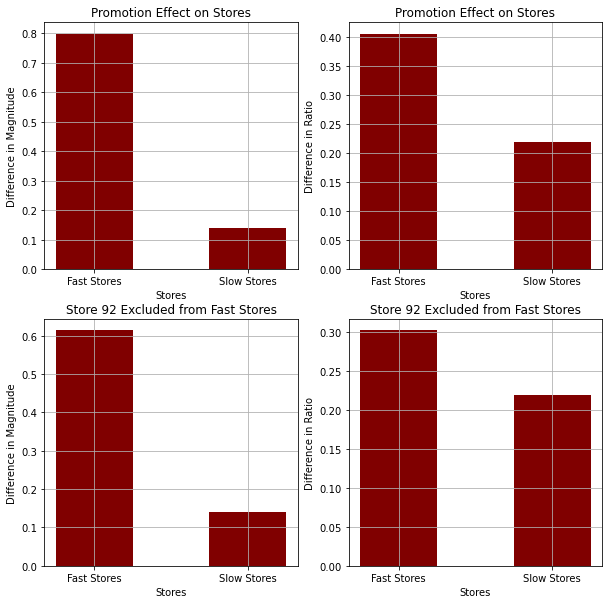

In [75]:
# creating the dataset
fig = plt.figure(figsize = (10, 10))

# creating the bar plot
plt.subplot(221)
plt.bar(["Fast Stores","Slow Stores"],[np.mean(difference_fast_stores_sale),np.mean(difference_slow_stores_sale)],color ='maroon', 
        width = 0.5)
plt.grid()
plt.ylabel("Difference in Magnitude")
plt.xlabel("Stores")
plt.title("Promotion Effect on Stores")

plt.subplot(222)
plt.bar(["Fast Stores","Slow Stores"],[np.mean(difference_fast_stores_sale_ratio),np.mean(difference_slow_stores_sale_ratio)],color ='maroon', 
        width = 0.5)
plt.grid()
plt.ylabel("Difference in Ratio")
plt.xlabel("Stores")
plt.title("Promotion Effect on Stores")

plt.subplot(223)
plt.bar(["Fast Stores","Slow Stores"],[np.mean(difference_fast_stores_sale2),np.mean(difference_slow_stores_sale)],color ='maroon', 
        width = 0.5)
plt.grid()
plt.ylabel("Difference in Magnitude")
plt.xlabel("Stores")
plt.title("Store 92 Excluded from Fast Stores")

plt.subplot(224)
plt.bar(["Fast Stores","Slow Stores"],[np.mean(difference_fast_stores_sale_ratio2),np.mean(difference_slow_stores_sale_ratio)],color ='maroon', 
        width = 0.5)
plt.grid()
plt.ylabel("Difference in Ratio")
plt.xlabel("Stores")
plt.title("Store 92 Excluded from Fast Stores")

# PART B

In [76]:
df_future_sales = pd.read_csv('assignment4.1b.csv')

In [77]:
df_future_sales.head()

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-08-01,2,9,1
1,2015-08-01,7,9,1
2,2015-08-01,62,9,1
3,2015-08-01,181,9,1
4,2015-08-01,6,20,1


In [78]:
#Visualize Dataset
print(df_future_sales.head())
print(df_future_sales.info())
(num_rows_future_sales,num_columns_future_sales)=df_sales.shape
print("There are", num_rows_future_sales, "observations in the dataset")
print(df_future_sales.describe())
print(True in df_future_sales.duplicated())

         Date  StoreCode  ProductCode  SalesQuantity
0  2015-08-01          2            9              1
1  2015-08-01          7            9              1
2  2015-08-01         62            9              1
3  2015-08-01        181            9              1
4  2015-08-01          6           20              1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028121 entries, 0 to 1028120
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Date           1028121 non-null  object
 1   StoreCode      1028121 non-null  int64 
 2   ProductCode    1028121 non-null  int64 
 3   SalesQuantity  1028121 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ MB
None
There are 1873618 observations in the dataset
          StoreCode   ProductCode  SalesQuantity
count  1.028121e+06  1.028121e+06   1.028121e+06
mean   1.693992e+02  1.601496e+02   2.052804e+00
std    1.004842e+02  8.033483e+01   4.699980e+00
mi

In [79]:
df_promotions.loc[4,"StartDate"] = '09/01/2015'
df_promotions.loc[4,"EndDate"] = '09/06/2015'

df_promotion5 = copy.deepcopy(df_promotions.iloc[4,:])
df_promotion5["StartDate"]= dt.strptime(df_promotion5["StartDate"],'%m/%d/%Y')
df_promotion5["EndDate"]  = dt.strptime(df_promotion5["EndDate"],'%m/%d/%Y')
df_promotion5

Period                    Promo5
StartDate    2015-09-01 00:00:00
EndDate      2015-09-06 00:00:00
Name: 4, dtype: object

In [80]:
df_future_sales["Date"] = df_future_sales["Date"].map(change_datetime)

In [81]:
temp = df_future_sales[(df_future_sales["Date"]>= df_promotion5["StartDate"]) & (df_future_sales["Date"] <= df_promotion5["EndDate"])]
promotion5_index = temp.index

## B.1. Product Sales Forecasting

In [82]:
average_weekly_nonprom_future_sale_per_store = np.zeros(num_products)

for i in range(num_products):
    prod_code = i+1
    if prod_code%50==0:
        print(prod_code)
    df_future_prod = df_future_sales[df_future_sales["ProductCode"]==prod_code]
    df_prod_future_nonprom = copy.deepcopy(df_future_prod[~df_future_prod.index.isin(promotion5_index)])
    num_nonprom_days= df_prod_future_nonprom["Date"].nunique()
    total_nonprom_future_sale = df_prod_future_nonprom["SalesQuantity"].sum()
    average_weekly_nonprom_future_sale_per_store[prod_code-1] = (weird_division(total_nonprom_future_sale,num_nonprom_days)*7)/num_stores

50
100
150
200
250
300


### Predict Product Cluster in the Nonprom Period

In [83]:
future_product_cluster   = np.zeros(num_products)
predict_product_ratio    = np.zeros(num_products)
predict_product_increase = np.zeros(num_products)

fast_future_product_index = []
slow_future_product_index = []
medium_future_product_index = []

## Predict Products Cluster
for i in range(num_products):
    if (average_weekly_nonprom_future_sale_per_store[i] <= 0.26):
        slow_future_product_index.append(i)
        future_product_cluster[i]   = 0
        predict_product_ratio[i]    = 0.262
        predict_product_increase[i] = 0.013
    elif (average_weekly_nonprom_future_sale_per_store[i] >= 1.26):
        fast_future_product_index.append(i)
        future_product_cluster[i]   = 2
        predict_product_ratio[i]    = 0.295
        predict_product_increase[i] = 1.51
    else:
        medium_future_product_index.append(i)
        future_product_cluster[i]   = 1
        predict_product_ratio[i]    = 0.171
        predict_product_increase[i] = 0.13

In [84]:
product_cluster = np.zeros(num_products)

## Predict Products Cluster
for i in range(num_products):
    if (average_weekly_nonprom_sale_per_store[i] <= 0.26):
        product_cluster[i] = 0
        
    elif (average_weekly_nonprom_sale_per_store[i] >= 1.26):
        product_cluster[i] = 2
    else:
        product_cluster[i] = 1

Text(0.5, 1.0, 'Expected Increase Ratio In Products')

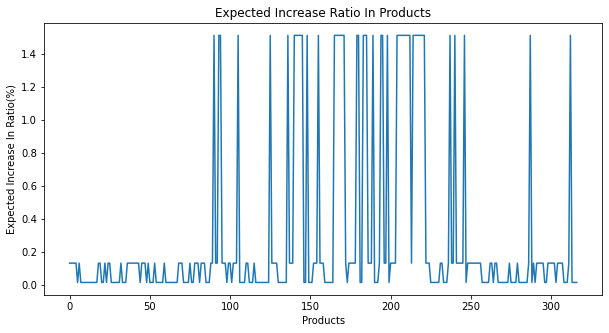

In [85]:
#Predicted Increase Ratio by Products
fig = plt.figure(figsize = (10, 5))
plt.plot(range(num_products),predict_product_increase)
plt.ylabel("Expected Increase In Ratio(%)")
plt.xlabel("Products")
plt.title("Expected Increase Ratio In Products")

### Calculate Real Promotion Response of Products

In [86]:
average_weekly_prom_future_sale_per_store = np.zeros(num_products)

for i in range(num_products):
    prod_code = i+1
    if prod_code%50==0:
        print(prod_code)
    df_future_prod = df_future_sales[df_future_sales["ProductCode"]==prod_code]
    df_prod_future_prom = copy.deepcopy(df_future_prod[df_future_prod.index.isin(promotion5_index)])
    num_prom_days= df_prod_future_prom["Date"].nunique()
    total_prom_future_sale = df_prod_future_prom["SalesQuantity"].sum()
    average_weekly_prom_future_sale_per_store[prod_code-1] = (weird_division(total_prom_future_sale,num_prom_days)*7)/num_stores

50
100
150
200
250
300


In [151]:
difference_average_sale_product = (average_weekly_prom_sale_per_store - average_weekly_nonprom_sale_per_store)

In [152]:
difference_average_future_sale_product = (average_weekly_prom_future_sale_per_store - average_weekly_nonprom_future_sale_per_store)
difference_average_future_sale_ratio_product = np.divide(difference_average_future_sale_product, abs(average_weekly_nonprom_future_sale_per_store), out=np.zeros_like(difference_average_future_sale_product,dtype=float), where=abs(average_weekly_nonprom_future_sale_per_store)!=0)

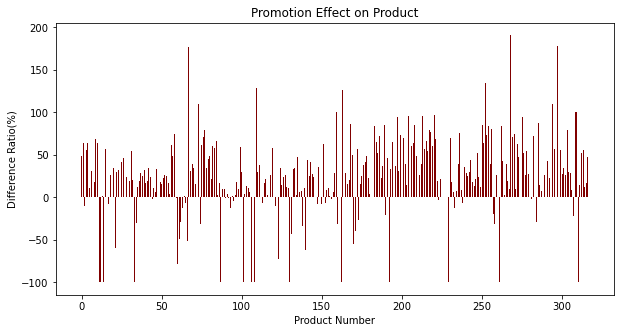

In [88]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(range(num_products),100*difference_average_future_sale_ratio_product,color ='maroon', 
        width = 0.6)

plt.xlabel("Product Number")
plt.ylabel("Difference Ratio(%)")
plt.title("Promotion Effect on Product")
plt.show()

Text(0.5, 1.0, 'Expected vs Real Promotion Effect')

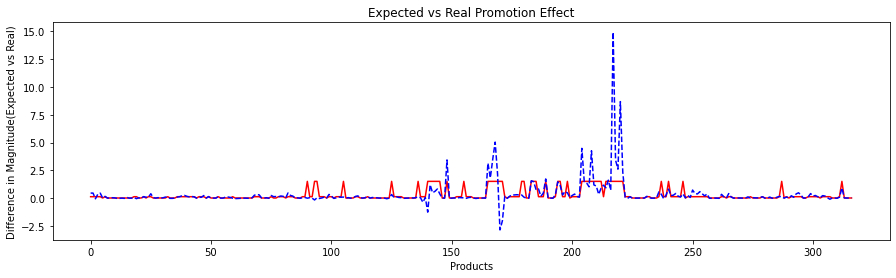

In [153]:
# Compare Expected and Actual Increase in the Test Set
fig = plt.figure(figsize = (15, 4))

# creating the plot
plt.plot(range(num_products), predict_product_increase,'r-')
plt.plot(range(num_products), difference_average_future_sale_product,'b--')
plt.ylabel("Difference in Magnitude(Expected vs Real)")
plt.xlabel("Products")
plt.title("Expected vs Real Promotion Effect")

In [90]:
difference_average_future_sale_product[165:171]

array([ 3.15105042,  1.82787115,  3.5018548 ,  5.04411765,  2.17520817,
       -2.85910364])

In [91]:
RMSE_RATIO_PRODUCTS        = math.sqrt(np.mean(np.square(predict_product_ratio-difference_average_future_sale_ratio_product)))
RMSE_RATIO_FAST_PRODUCTS   = math.sqrt(np.mean(np.square(predict_product_ratio[fast_future_product_index]-difference_average_future_sale_ratio_product[fast_future_product_index])))
RMSE_RATIO_SLOW_PRODUCTS   = math.sqrt(np.mean(np.square(predict_product_ratio[slow_future_product_index]-difference_average_future_sale_ratio_product[slow_future_product_index])))
RMSE_RATIO_MEDIUM_PRODUCTS = math.sqrt(np.mean(np.square(predict_product_ratio[medium_future_product_index]-difference_average_future_sale_ratio_product[medium_future_product_index])))
print(RMSE_RATIO_PRODUCTS)
print(RMSE_RATIO_FAST_PRODUCTS)
print(RMSE_RATIO_SLOW_PRODUCTS)
print(RMSE_RATIO_MEDIUM_PRODUCTS)

0.46592908049539006
0.3704956484058133
0.5964357113795521
0.3115803673679243


In [92]:
### RMSE PERFORMANCE OF MAGNITUDE PREDICTION OF CLUSTERED PRODUCTS
RMSE_PRODUCTS_MAGNITUDE        = math.sqrt(np.mean(np.square(predict_product_increase-difference_average_future_sale_product)))
RMSE_FAST_PRODUCTS_MAGNITUDE   = math.sqrt(np.mean(np.square(predict_product_increase[fast_future_product_index]-difference_average_future_sale_product[fast_future_product_index])))
RMSE_SLOW_PRODUCTS_MAGNITUDE   = math.sqrt(np.mean(np.square(predict_product_increase[slow_future_product_index]-difference_average_future_sale_product[slow_future_product_index])))
RMSE_MEDIUM_PRODUCTS_MAGNITUDE = math.sqrt(np.mean(np.square(predict_product_increase[medium_future_product_index]-difference_average_future_sale_product[medium_future_product_index])))
print(RMSE_PRODUCTS_MAGNITUDE)
print(RMSE_FAST_PRODUCTS_MAGNITUDE)
print(RMSE_SLOW_PRODUCTS_MAGNITUDE)
print(RMSE_MEDIUM_PRODUCTS_MAGNITUDE)

1.0572285942477826
2.59047092222775
0.032343495453947456
0.20368961716460846


In [93]:
predict_product_increase[fast_future_product_index]

array([1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51,
       1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51,
       1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51,
       1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51,
       1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51, 1.51])

In [94]:
np.mean(difference_average_future_sale_product[fast_product_index])

1.3203266498895274

### To measure the effect of the model we developed in the first section, lets look at what MSE would be if we did not make any clustering. If we did not cluster, we would decide our sale increase by 0.232 by promotion.

In [95]:
### RMSE PERFORMANCE OF RATIO PREDICTION OF NONCLUSTERED PRODUCTS
prediction_ratio_not_clustered     = 0.232
RMSE_PRODUCTS_RATIO_NOT_CLUSTERED        = math.sqrt(np.mean(np.square(prediction_ratio_not_clustered-difference_average_future_sale_ratio_product)))
RMSE_FAST_PRODUCTS_RATIO_NOT_CLUSTERED   = math.sqrt(np.mean(np.square(prediction_ratio_not_clustered-difference_average_future_sale_ratio_product[fast_future_product_index])))
RMSE_SLOW_PRODUCTS_RATIO_NOT_CLUSTERED   = math.sqrt(np.mean(np.square(prediction_ratio_not_clustered-difference_average_future_sale_ratio_product[slow_future_product_index])))
RMSE_MEDIUM_PRODUCTS_RATIO_NOT_CLUSTERED = math.sqrt(np.mean(np.square(prediction_ratio_not_clustered-difference_average_future_sale_ratio_product[medium_future_product_index])))
print(RMSE_PRODUCTS_RATIO_NOT_CLUSTERED)
print(RMSE_FAST_PRODUCTS_RATIO_NOT_CLUSTERED)
print(RMSE_SLOW_PRODUCTS_RATIO_NOT_CLUSTERED)
print(RMSE_MEDIUM_PRODUCTS_RATIO_NOT_CLUSTERED)

0.45921479099363793
0.3900779288743296
0.5905624446546186
0.2880949997327081


In [164]:
### RMSE PERFORMANCE OF MAGNITUDE PREDICTION OF NONCLUSTERED PRODUCTS
prediction_product_magnitude_not_clustered   = 0.357
RMSE_PRODUCTS_MAGNITUDE_NOT_CLUSTERED        = math.sqrt(np.mean(np.square(prediction_product_magnitude_not_clustered-difference_average_future_sale_product)))
RMSE_FAST_PRODUCTS_MAGNITUDE_NOT_CLUSTERED   = math.sqrt(np.mean(np.square(prediction_product_magnitude_not_clustered-difference_average_future_sale_product[fast_future_product_index])))
RMSE_SLOW_PRODUCTS_MAGNITUDE_NOT_CLUSTERED   = math.sqrt(np.mean(np.square(prediction_product_magnitude_not_clustered-difference_average_future_sale_product[slow_future_product_index])))
RMSE_MEDIUM_PRODUCTS_MAGNITUDE_NOT_CLUSTERED = math.sqrt(np.mean(np.square(prediction_product_magnitude_not_clustered-difference_average_future_sale_product[medium_future_product_index])))
print(RMSE_PRODUCTS_MAGNITUDE_NOT_CLUSTERED)
print(RMSE_FAST_PRODUCTS_MAGNITUDE_NOT_CLUSTERED)
print(RMSE_SLOW_PRODUCTS_MAGNITUDE_NOT_CLUSTERED)
print(RMSE_MEDIUM_PRODUCTS_MAGNITUDE_NOT_CLUSTERED)

1.1856112056737838
2.845870115296805
0.3451075651932967
0.25034981658832556


In [163]:
### RMSE PERFORMANCE OF MAGNITUDE PREDICTION OF NONCLUSTERED PRODUCTS
prediction_product_magnitude_NC_ALL   = difference_average_sale_product
RMSE_PRODUCTS_MAGNITUDE_NC_ALL        = math.sqrt(np.mean(np.square(prediction_product_magnitude_NC_ALL-difference_average_future_sale_product)))
RMSE_FAST_PRODUCTS_MAGNITUDE_NC_ALL   = math.sqrt(np.mean(np.square(prediction_product_magnitude_NC_ALL[fast_future_product_index]-difference_average_future_sale_product[fast_future_product_index])))
RMSE_SLOW_PRODUCTS_MAGNITUDE_NC_ALL   = math.sqrt(np.mean(np.square(prediction_product_magnitude_NC_ALL[slow_future_product_index]-difference_average_future_sale_product[slow_future_product_index])))
RMSE_MEDIUM_PRODUCTS_MAGNITUDE_NC_ALL = math.sqrt(np.mean(np.square(prediction_product_magnitude_NC_ALL[medium_future_product_index]-difference_average_future_sale_product[medium_future_product_index])))
print(RMSE_PRODUCTS_MAGNITUDE_NC_ALL)
print(RMSE_FAST_PRODUCTS_MAGNITUDE_NC_ALL)
print(RMSE_SLOW_PRODUCTS_MAGNITUDE_NC_ALL)
print(RMSE_MEDIUM_PRODUCTS_MAGNITUDE_NC_ALL)

0.5791427287315385
1.3607809894786065
0.18352247962993934
0.20610739869372682


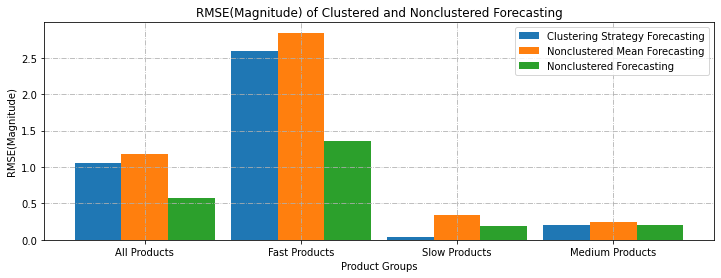

In [165]:
### COMPARISON OF RMSE(MAGNITUDE) PERFORMANCES OF CLUSTERING VS NONCLUSTERED PRODUCTS
fig = plt.figure(figsize = (12, 4))

X = ['All Products','Fast Products','Slow Products','Medium Products'] 
Clustering        = [RMSE_PRODUCTS_MAGNITUDE,RMSE_FAST_PRODUCTS_MAGNITUDE,RMSE_SLOW_PRODUCTS_MAGNITUDE,RMSE_MEDIUM_PRODUCTS_MAGNITUDE] 
NonClustered_Mean = [RMSE_PRODUCTS_MAGNITUDE_NOT_CLUSTERED,RMSE_FAST_PRODUCTS_MAGNITUDE_NOT_CLUSTERED,RMSE_SLOW_PRODUCTS_MAGNITUDE_NOT_CLUSTERED,RMSE_MEDIUM_PRODUCTS_MAGNITUDE_NOT_CLUSTERED] 
NonClustered_As   = [RMSE_PRODUCTS_MAGNITUDE_NC_ALL,RMSE_FAST_PRODUCTS_MAGNITUDE_NC_ALL,RMSE_SLOW_PRODUCTS_MAGNITUDE_NC_ALL,RMSE_MEDIUM_PRODUCTS_MAGNITUDE_NC_ALL] 

X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.3, Clustering, 0.3, label = 'Clustering Strategy Forecasting') 
plt.bar(X_axis + 0.0, NonClustered_Mean, 0.3, label = 'Nonclustered Mean Forecasting')
plt.bar(X_axis + 0.3, NonClustered_As, 0.3, label = 'Nonclustered Forecasting') 

plt.grid(linestyle = "-.")
plt.xticks(X_axis, X) 
plt.xlabel("Product Groups") 
plt.ylabel("RMSE(Magnitude)") 
plt.title("RMSE(Magnitude) of Clustered and Nonclustered Forecasting") 
plt.legend() 
plt.show() 

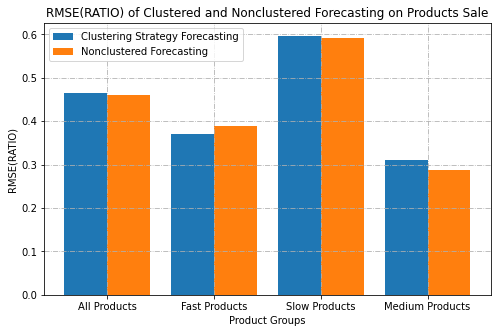

In [98]:
### COMPARISON OF RMSE(RATIO) PERFORMANCES OF CLUSTERING VS NONCLUSTERED
fig = plt.figure(figsize = (8, 5))

X = ['All Products','Fast Products','Slow Products','Medium Products'] 
Clustering    = [RMSE_RATIO_PRODUCTS,RMSE_RATIO_FAST_PRODUCTS,RMSE_RATIO_SLOW_PRODUCTS,RMSE_RATIO_MEDIUM_PRODUCTS] 
NonClustered  = [RMSE_PRODUCTS_RATIO_NOT_CLUSTERED,RMSE_FAST_PRODUCTS_RATIO_NOT_CLUSTERED,RMSE_SLOW_PRODUCTS_RATIO_NOT_CLUSTERED,RMSE_MEDIUM_PRODUCTS_RATIO_NOT_CLUSTERED] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, Clustering, 0.4, label = 'Clustering Strategy Forecasting') 
plt.bar(X_axis + 0.2, NonClustered, 0.4, label = 'Nonclustered Forecasting') 
plt.grid(linestyle = "-.")
plt.xticks(X_axis, X) 
plt.xlabel("Product Groups") 
plt.ylabel("RMSE(RATIO)") 
plt.title("RMSE(RATIO) of Clustered and Nonclustered Forecasting on Products Sale") 
plt.legend() 
plt.show() 

## B.2 Stores Sale Forecasting

In [99]:
average_weekly_nonprom_future_sale_per_product = np.zeros(num_stores)

for i in range(num_stores):
    store_code = i+1
    if store_code%50==0:
        print(store_code)
    df_future_store = df_future_sales[df_future_sales["StoreCode"]==store_code]
    df_store_future_nonprom = copy.deepcopy(df_future_store[~df_future_store.index.isin(promotion5_index)])
    num_nonprom_days= df_store_future_nonprom["Date"].nunique()
    total_nonprom_future_sale = df_store_future_nonprom["SalesQuantity"].sum()
    average_weekly_nonprom_future_sale_per_product[store_code-1] = (weird_division(total_nonprom_future_sale,num_nonprom_days)*7)/num_products

50
100
150
200
250
300


### Cluster the Stores and Predict Promotion Bump

In [100]:
future_store_cluster   = np.zeros(num_stores)
predict_store_ratio    = np.zeros(num_stores)
predict_store_increase = np.zeros(num_stores)

fast_future_store_index = []
slow_future_store_index = []
medium_future_store_index = []

## Predict Store Cluster
## Predict Store Promotion Bump
for i in range(num_stores):
    if (average_weekly_nonprom_future_sale_per_product[i] <= 0.8):
        slow_future_store_index.append(i)
        future_store_cluster[i]   = 0
        predict_store_ratio[i]    = 0.17
        predict_store_increase[i] = 0.14
    elif (average_weekly_nonprom_future_sale_per_product[i] >= 1.24):
        fast_future_store_index.append(i)
        future_store_cluster[i]   = 2
        predict_store_ratio[i]    = 0.41
        predict_store_increase[i] = 0.8
    else:
        medium_future_store_index.append(i)
        future_store_cluster[i]   = 1
        predict_store_ratio[i]    = 0.27
        predict_store_increase[i] = 0.27

Text(0.5, 1.0, 'Expected Increase Ratio In Stores')

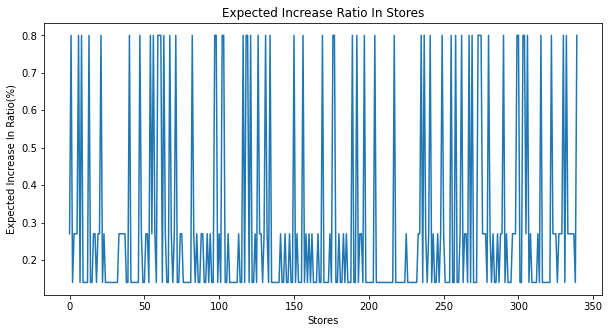

In [101]:
#Predicted Increase Ratio by Stores
fig = plt.figure(figsize = (10, 5))
plt.plot(range(num_stores),predict_store_increase)
plt.ylabel("Expected Increase In Ratio(%)")
plt.xlabel("Stores")
plt.title("Expected Increase Ratio In Stores")

### Calculate Real Promotion Response of Stores

In [102]:
average_weekly_prom_future_sale_per_product = np.zeros(num_stores)

for i in range(num_stores):
    store_code = i+1
    if store_code%50==0:
        print(store_code)
    df_future_store = df_future_sales[df_future_sales["StoreCode"]==store_code]
    df_store_future_prom = copy.deepcopy(df_future_store[df_future_store.index.isin(promotion5_index)])
    num_prom_days= df_store_future_prom["Date"].nunique()
    total_prom_future_sale = df_store_future_prom["SalesQuantity"].sum()
    average_weekly_prom_future_sale_per_product[store_code-1] = (weird_division(total_prom_future_sale,num_prom_days)*7)/num_products

50
100
150
200
250
300


In [155]:
difference_average_sale_stores = (average_weekly_prom_sale_per_product - average_weekly_nonprom_sale_per_product)

In [156]:
difference_average_future_sale_store = (average_weekly_prom_future_sale_per_product - average_weekly_nonprom_future_sale_per_product)
difference_average_future_sale_ratio_store = np.divide(difference_average_future_sale_store, abs(average_weekly_nonprom_future_sale_per_product), out=np.zeros_like(difference_average_future_sale_store,dtype=float), where=abs(average_weekly_nonprom_future_sale_per_product)!=0)

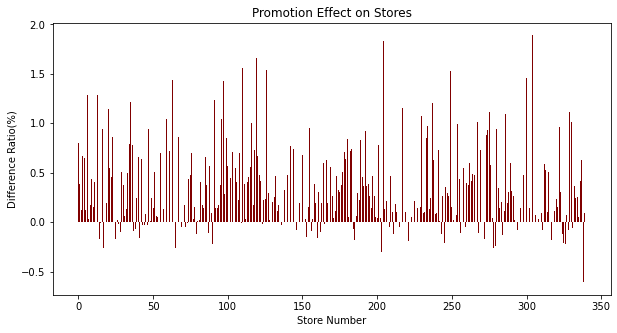

In [104]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(range(num_stores),difference_average_future_sale_store,color ='maroon', 
        width = 0.6)

plt.xlabel("Store Number")
plt.ylabel("Difference Ratio(%)")
plt.title("Promotion Effect on Stores")
plt.show()

In [105]:
print(average_weekly_prom_future_sale_per_product[338])
print(average_weekly_nonprom_future_sale_per_product[338])

0.0
0.610410094637224


(-0.5, 2.0)

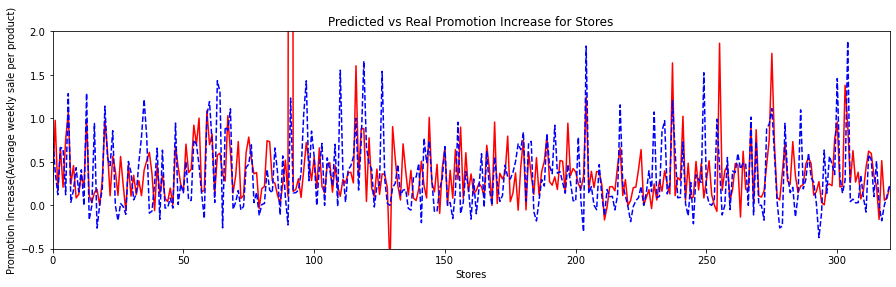

In [157]:
# Compare Expected and Actual Increase of Stores Sale in the Test Set
fig = plt.figure(figsize = (15, 4))

# creating the plot
plt.plot(range(num_stores), difference_average_sale_stores,'r-')
plt.plot(range(num_stores), difference_average_future_sale_store,'b--')
plt.ylabel("Promotion Increase(Average weekly sale per product)")
plt.xlabel("Stores")
plt.title("Predicted vs Real Promotion Increase for Stores")
ax = plt.gca()
ax.set_xlim([0, 320])
ax.set_ylim([-0.5, 2])

In [158]:
### RMSE PERFORMANCE OF RATIO PREDICTION
RMSE_STORES_RATIO        = math.sqrt(np.mean(np.square(predict_store_ratio-difference_average_future_sale_ratio_store)))
RMSE_FAST_STORES_RATIO   = math.sqrt(np.mean(np.square(predict_store_ratio[fast_future_store_index]-difference_average_future_sale_ratio_store[fast_future_store_index])))
RMSE_SLOW_STORES_RATIO   = math.sqrt(np.mean(np.square(predict_store_ratio[slow_future_store_index]-difference_average_future_sale_ratio_store[slow_future_store_index])))
RMSE_MEDIUM_STORES_RATIO = math.sqrt(np.mean(np.square(predict_store_ratio[medium_future_store_index]-difference_average_future_sale_ratio_store[medium_future_store_index])))
print(RMSE_STORES_RATIO)
print(RMSE_FAST_STORES_RATIO)
print(RMSE_SLOW_STORES_RATIO)
print(RMSE_MEDIUM_STORES_RATIO)

0.4436418545898942
0.27449584218155454
0.50588254020993
0.3937509933758976


In [108]:
print(predict_store_ratio[medium_future_store_index])

[0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27
 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27
 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27
 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27
 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27
 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27 0.27
 0.27 0.27 0.27 0.27 0.27 0.27]


In [159]:
### RMSE PERFORMANCE OF MAGNITUDE PREDICTION
RMSE_STORES_MAGNITUDE        = math.sqrt(np.mean(np.square(predict_store_increase-difference_average_future_sale_store)))
RMSE_FAST_STORES_MAGNITUDE   = math.sqrt(np.mean(np.square(predict_store_increase[fast_future_store_index]-difference_average_future_sale_store[fast_future_store_index])))
RMSE_SLOW_STORES_MAGNITUDE   = math.sqrt(np.mean(np.square(predict_store_increase[slow_future_store_index]-difference_average_future_sale_store[slow_future_store_index])))
RMSE_MEDIUM_STORES_MAGNITUDE = math.sqrt(np.mean(np.square(predict_store_increase[medium_future_store_index]-difference_average_future_sale_store[medium_future_store_index])))
print(RMSE_STORES_MAGNITUDE)
print(RMSE_FAST_STORES_MAGNITUDE)
print(RMSE_SLOW_STORES_MAGNITUDE)
print(RMSE_MEDIUM_STORES_MAGNITUDE)

0.35857639222325316
0.4629789276817221
0.30532258569788256
0.38037898603442827


### What if we did not make clustering?

In [139]:
prediction_ratio_store_not_clustered     = np.mean(difference_average_sale_ratio_stores)
prediction_magnitude_store_not_clustered = np.mean(difference_average_sale_stores)
prediction_magnitude_store_nc_all        = difference_average_sale_stores

In [160]:
RMSE_STORES_RATIO_NOT_CLUSTERED        = math.sqrt(np.mean(np.square(prediction_ratio_store_not_clustered-difference_average_future_sale_ratio_store)))
RMSE_FAST_STORES_RATIO_NOT_CLUSTERED   = math.sqrt(np.mean(np.square(prediction_ratio_store_not_clustered-difference_average_future_sale_ratio_store[fast_future_store_index])))
RMSE_SLOW_STORES_RATIO_NOT_CLUSTERED   = math.sqrt(np.mean(np.square(prediction_ratio_store_not_clustered-difference_average_future_sale_ratio_store[slow_future_store_index])))
RMSE_MEDIUM_STORES_RATIO_NOT_CLUSTERED = math.sqrt(np.mean(np.square(prediction_ratio_store_not_clustered-difference_average_future_sale_ratio_store[medium_future_store_index])))
print(RMSE_STORES_RATIO_NOT_CLUSTERED)
print(RMSE_FAST_STORES_RATIO_NOT_CLUSTERED)
print(RMSE_SLOW_STORES_RATIO_NOT_CLUSTERED)
print(RMSE_MEDIUM_STORES_RATIO_NOT_CLUSTERED)

0.4377269013516604
0.30828546722427413
0.49199521385607986
0.38871589272206597


In [161]:
RMSE_STORES_MAGNITUDE_NOT_CLUSTERED        = math.sqrt(np.mean(np.square(prediction_magnitude_store_not_clustered-difference_average_future_sale_store)))
RMSE_FAST_STORES_MAGNITUDE_NOT_CLUSTERED   = math.sqrt(np.mean(np.square(prediction_magnitude_store_not_clustered-difference_average_future_sale_store[fast_future_store_index])))
RMSE_SLOW_STORES_MAGNITUDE_NOT_CLUSTERED   = math.sqrt(np.mean(np.square(prediction_magnitude_store_not_clustered-difference_average_future_sale_store[slow_future_store_index])))
RMSE_MEDIUM_STORES_MAGNITUDE_NOT_CLUSTERED = math.sqrt(np.mean(np.square(prediction_magnitude_store_not_clustered-difference_average_future_sale_store[medium_future_store_index])))
print(RMSE_STORES_MAGNITUDE_NOT_CLUSTERED)
print(RMSE_FAST_STORES_MAGNITUDE_NOT_CLUSTERED)
print(RMSE_SLOW_STORES_MAGNITUDE_NOT_CLUSTERED)
print(RMSE_MEDIUM_STORES_MAGNITUDE_NOT_CLUSTERED)

0.42456416871623864
0.5713451889719421
0.39158536046908293
0.3710789920714339


In [162]:
RMSE_STORES_MAGNITUDE_NC_ALL      = math.sqrt(np.mean(np.square(prediction_magnitude_store_nc_all - difference_average_future_sale_store)))
RMSE_FAST_STORES_MAGNITUDE_NC_ALL = math.sqrt(np.mean(np.square(prediction_magnitude_store_nc_all[fast_future_store_index] - difference_average_future_sale_store[fast_future_store_index])))
RMSE_SLOW_STORES_MAGNITUDE_NC_ALL = math.sqrt(np.mean(np.square(prediction_magnitude_store_nc_all[slow_future_store_index] - difference_average_future_sale_store[slow_future_store_index])))
RMSE_MEDIUM_STORES_MAGNITUDE_NC_ALL = math.sqrt(np.mean(np.square(prediction_magnitude_store_nc_all[medium_future_store_index] - difference_average_future_sale_store[medium_future_store_index])))
print(RMSE_STORES_MAGNITUDE_NC_ALL)
print(RMSE_FAST_STORES_MAGNITUDE_NC_ALL)
print(RMSE_SLOW_STORES_MAGNITUDE_NC_ALL)
print(RMSE_MEDIUM_STORES_MAGNITUDE_NC_ALL)

1.2335499199800115
0.5439460209715398
1.603066099125147
0.38894116232382614


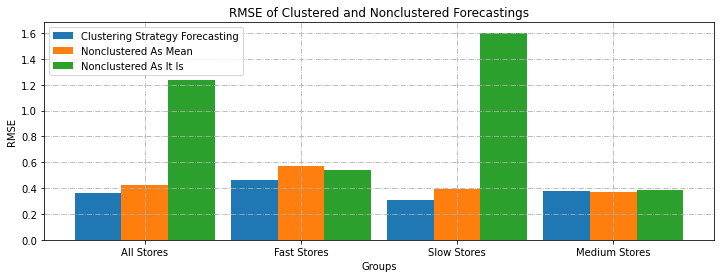

In [149]:
### COMPARISON OF RMSE(MAGNITUDE) PERFORMANCES OF CLUSTERING VS NONCLUSTERED
fig = plt.figure(figsize = (12, 4))

X = ['All Stores','Fast Stores','Slow Stores','Medium Stores'] 
Clustering         = [RMSE_STORES_MAGNITUDE,RMSE_FAST_STORES_MAGNITUDE,RMSE_SLOW_STORES_MAGNITUDE,RMSE_MEDIUM_STORES_MAGNITUDE] 
NonClustered_Mean  = [RMSE_STORES_MAGNITUDE_NOT_CLUSTERED,RMSE_FAST_STORES_MAGNITUDE_NOT_CLUSTERED,RMSE_SLOW_STORES_MAGNITUDE_NOT_CLUSTERED,RMSE_MEDIUM_STORES_MAGNITUDE_NOT_CLUSTERED] 
NonClustered_As    = [RMSE_STORES_MAGNITUDE_NC_ALL,RMSE_FAST_STORES_MAGNITUDE_NC_ALL,RMSE_SLOW_STORES_MAGNITUDE_NC_ALL,RMSE_MEDIUM_STORES_MAGNITUDE_NC_ALL]  
    
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.3, Clustering, 0.3, label = 'Clustering Strategy Forecasting') 
plt.bar(X_axis + 0.0, NonClustered_Mean, 0.3, label = 'Nonclustered As Mean')
plt.bar(X_axis + 0.3, NonClustered_As, 0.3, label = 'Nonclustered As It Is') 
plt.grid(linestyle = "-.")
plt.xticks(X_axis, X) 
plt.xlabel("Groups") 
plt.ylabel("RMSE") 
plt.title("RMSE of Clustered and Nonclustered Forecastings") 
plt.legend() 
plt.show() 

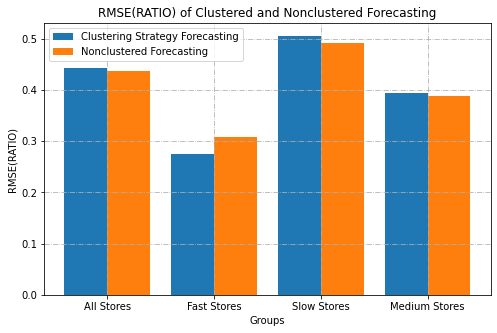

In [114]:
### COMPARISON OF RMSE(RATIO) PERFORMANCES OF CLUSTERING VS NONCLUSTERED
fig = plt.figure(figsize = (8, 5))

X = ['All Stores','Fast Stores','Slow Stores','Medium Stores'] 
Clustering    = [RMSE_STORES_RATIO,RMSE_FAST_STORES_RATIO,RMSE_SLOW_STORES_RATIO,RMSE_MEDIUM_STORES_RATIO] 
NonClustered  = [RMSE_STORES_RATIO_NOT_CLUSTERED,RMSE_FAST_STORES_RATIO_NOT_CLUSTERED,RMSE_SLOW_STORES_RATIO_NOT_CLUSTERED,RMSE_MEDIUM_STORES_RATIO_NOT_CLUSTERED] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, Clustering, 0.4, label = 'Clustering Strategy Forecasting') 
plt.bar(X_axis + 0.2, NonClustered, 0.4, label = 'Nonclustered Forecasting') 
plt.grid(linestyle = "-.")
plt.xticks(X_axis, X) 
plt.xlabel("Groups") 
plt.ylabel("RMSE(RATIO)") 
plt.title("RMSE(RATIO) of Clustered and Nonclustered Forecasting") 
plt.legend() 
plt.show() 

# CONCLUSION

In [115]:
stores_corr_prom   = np.corrcoef(difference_average_sale_stores, average_weekly_nonprom_sale_per_product)[0,1]
products_corr_prom = np.corrcoef(difference_average_sale_product, average_weekly_nonprom_sale_per_store)[0,1]
print(stores_corr_prom)
print(products_corr_prom)

0.22151128693417824
0.8270192467146037


In [116]:
temp1 = np.delete(difference_average_sale_stores,91)
temp2 = np.delete(average_weekly_nonprom_sale_per_product,91)
stores_corr_prom_without91 = np.corrcoef(temp1, temp2)[0,1]
print(stores_corr_prom_without91)

0.7273780891482718


In [117]:
stores_corr_prom_ratio   = (np.corrcoef(difference_average_sale_ratio_stores, average_weekly_nonprom_sale_per_product))[0,1]                                                                                                        
products_corr_prom_ratio = np.corrcoef(difference_average_sale_ratio_product, average_weekly_nonprom_sale_per_store)[0,1]
print(stores_corr_prom_ratio)
print(products_corr_prom_ratio)

0.09375458614967225
0.030008843724732635


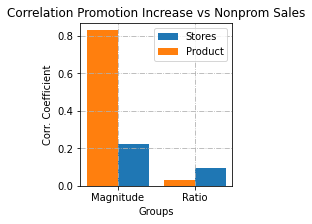

In [118]:
fig = plt.figure(figsize = (6, 3))

plt.subplot(1,2,1)
X = ['Magnitude','Ratio'] 
Product = [products_corr_prom, products_corr_prom_ratio]
Stores = [stores_corr_prom, stores_corr_prom_ratio]
X_axis = np.arange(len(X)) 
plt.bar(X_axis + 0.2, Stores, 0.4, label = 'Stores')
plt.bar(X_axis - 0.2, Product, 0.4, label = 'Product') 
plt.grid(linestyle = "-.")
plt.xticks(X_axis, X) 
plt.xlabel("Groups") 
plt.ylabel("Corr. Coefficient") 
plt.title("Correlation Promotion Increase vs Nonprom Sales") 
plt.legend() 
plt.show() 

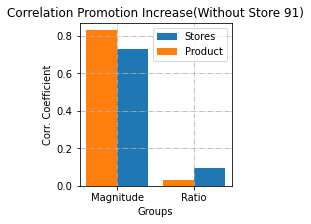

In [119]:
fig = plt.figure(figsize = (6, 3))

plt.subplot(1,2,1)
X = ['Magnitude','Ratio'] 
Product = [products_corr_prom, products_corr_prom_ratio]
Stores = [stores_corr_prom_without91, stores_corr_prom_ratio]
X_axis = np.arange(len(X))
plt.bar(X_axis + 0.2, Stores, 0.4, label = 'Stores')
plt.bar(X_axis - 0.2, Product, 0.4, label = 'Product') 
plt.grid(linestyle = "-.")
plt.xticks(X_axis, X) 
plt.xlabel("Groups") 
plt.ylabel("Corr. Coefficient") 
plt.title("Correlation Promotion Increase(Without Store 91)") 
plt.legend() 
plt.show()

In [120]:
reduced_rmse_stores   = 100*(RMSE_STORES_MAGNITUDE_NOT_CLUSTERED - RMSE_STORES_MAGNITUDE)/(RMSE_STORES_MAGNITUDE_NOT_CLUSTERED)
reduced_rmse_products = 100*(RMSE_PRODUCTS_MAGNITUDE_NOT_CLUSTERED - RMSE_PRODUCTS_MAGNITUDE)/(RMSE_PRODUCTS_MAGNITUDE_NOT_CLUSTERED)
print("For Stores Sale Forecasting, RMSE is reduced by %1.2f" % reduced_rmse_stores,"%")
print("For Products Sale Forecasting, RMSE is reduced by %1.2f" % reduced_rmse_products,"%")

For Stores Sale Forecasting, RMSE is reduced by 15.54 %
For Products Sale Forecasting, RMSE is reduced by 10.83 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


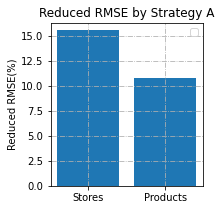

In [121]:
fig = plt.figure(figsize = (6, 3))

plt.subplot(1,2,1)
plt.bar(["Stores","Products"], [reduced_rmse_stores,reduced_rmse_products])
plt.grid(linestyle = "-.")
plt.ylabel("Reduced RMSE(%)") 
plt.title("Reduced RMSE by Strategy A") 
plt.legend() 
plt.show()

### Load Product Categories

In [122]:
df_product_categories = pd.read_csv('assignment4.1c.csv')

In [123]:
print(df_product_categories)

     ProductCode ProductGroup1  ProductGroup2
0              1             A              5
1              2             A              5
2              3             A              5
3              4             A              5
4              5             A              5
..           ...           ...            ...
312          313             A              5
313          314             F             27
314          315             D             16
315          316             G              3
316          317             J              8

[317 rows x 3 columns]


In [124]:
df_product_categories.iloc[[160, 163, 165, 182, 226, 227, 228, 309]] ## products returned positive from negative

,ProductCode,ProductGroup1,ProductGroup2
160,161,G,24
163,164,F,2
165,166,G,4
182,183,I,10
226,227,A,5
227,228,A,5
228,229,I,10
309,310,G,24


In [125]:
df_product_categories.iloc[[205, 207, 209, 210, 213, 218, 219, 220, 221]] ## products affected more both in sale and in ratio

,ProductCode,ProductGroup1,ProductGroup2
205,206,A,5
207,208,A,5
209,210,A,5
210,211,A,5
213,214,A,5
218,219,A,5
219,220,A,5
220,221,A,5
221,222,A,5


In [126]:
df_product_categories.iloc[[13, 193, 229, 231, 268, 291]]#products affected more in ratio

,ProductCode,ProductGroup1,ProductGroup2
13,14,H,15
193,194,A,5
229,230,J,27
231,232,I,10
268,269,D,29
291,292,I,10


In [127]:
temp = df_product_categories.loc[(df_product_categories["ProductGroup1"]=='G')&(df_product_categories["ProductGroup2"]==4)]
G4   = temp["ProductCode"].to_numpy()

In [128]:
temp = df_product_categories.loc[(df_product_categories["ProductGroup1"]=='A')&(df_product_categories["ProductGroup2"]==5)]
A5   = temp["ProductCode"].to_numpy()

[166 167 168 169 170 171 172]
1.0671025716027838
1.5421614554744527


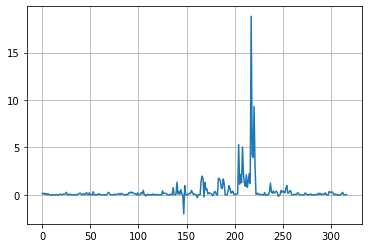

In [129]:
print(G4)
print(np.mean(difference_average_sale_product[G4-1]))
print(np.mean(difference_average_future_sale_product[G4-1]))
plt.plot(difference_average_sale_product)
plt.grid()

In [130]:
np.where(difference_average_sale_product>1)

(array([140, 165, 166, 167, 169, 183, 184, 185, 188, 189, 204, 205, 206,
        207, 208, 209, 210, 212, 214, 215, 216, 217, 218, 219, 220, 221,
        237], dtype=int64),)

## These are genereally from Categories A5 AND G4. These two categories respond more than others. 

In [131]:
print(np.mean(difference_average_sale_product))
print(np.mean(difference_average_sale_product[A5-1]))
print(np.mean(difference_average_future_sale_product[A5-1]))

0.3567650786855136
1.229082537573527
1.0457506856385543


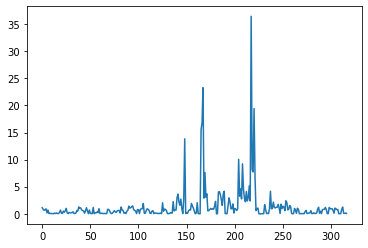

In [132]:
plt.plot(average_weekly_sale_per_store)

In [133]:
fast_products = (np.array(fast_product_index)).reshape(-1,)
print(fast_products.shape)
temp = df_product_categories.iloc[fast_products]

(63,)
